## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [210]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [211]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [212]:
df.shape    # here shape is not a function

(294478, 5)

c. The number of unique users in the dataset.

In [213]:
unique_user = df['user_id'].nunique()
unique_user

290584

d. The proportion of users converted.

In [214]:
#df[df['converted']== 1].mean() # wrong: same case as the one I asked before
df.converted.mean()   # here ask the users converted 

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [215]:
not_line_up_1 = df.query(" group=='treatment' and landing_page=='old_page'").count()

In [216]:
not_line_up_2 = df.query(" group=='control' and landing_page=='new_page'").count()

In [217]:
not_line_up_1 + not_line_up_2

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [218]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [219]:
# only store the aligned data in df2
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [220]:
# Double Check all of the incorrect rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [221]:
df2['converted'].value_counts()

0    255832
1     34753
Name: converted, dtype: int64

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [222]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [223]:
df2['user_id'].duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [224]:
df2[df2['user_id'].duplicated(keep=False)]
# to show the duplicated two rows , set "keep = False"

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [225]:
df2.drop_duplicates()
df2.duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [226]:
round(df2.converted.mean(),4)

0.1196

b. Given that an individual was in the `control` group, what is the probability they converted?

In [227]:
# Bayes rules 
control_ver =float(df2.query("group=='control' and converted=='1'")['user_id'].nunique() ) 
control = float(df2.query("group=='control'")['user_id'].nunique())
round(control_ver / control,4)

0.1204

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [228]:
# Bayes rules 
treat_ver =float(df2.query("group=='treatment' and converted=='1'")['user_id'].nunique() ) 
treat = float(df2.query("group=='treatment'")['user_id'].nunique())
round(treat_ver / treat,4)

0.1188

d. What is the probability that an individual received the new page?

In [229]:
new_page = float(df2.query("landing_page == 'new_page'")['user_id'].nunique())
total = float(df2.shape[0])
round(new_page / total,4)

0.5001

What is the converted probability Given that an individual was in new landing page?

In [230]:
old_page = float(df2.query("landing_page == 'new_page' and converted == 1 ")['user_id'].nunique())
total = float(df2.query("landing_page == 'new_page'")['user_id'].nunique())
                  
round(old_page / total,4)

0.1188

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Your answer goes here.**  No.
About 12.04% control group is likely to be converted while 11.88% treatment group is likely to be converted. The result is quite similar. So there is no strong evidence to prove a certain page leads to more conversions.


<a id='ab_test'></a>
### Part II - A/B Test

#### Background Information to help you better understand the results : 
* If P value is really small,  less likely to observe the statistic in the null , more likely from the alternative. 
* p-value is large you will end up staying with the null hypothesis as your choice.

* Type 1 error threshold is alpha 
* If p < alpha ,  reject the null , choose H1
* If p > alpha , fail to reject the null, choose H0
 





Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
* p_value is better than Type I error threshold 5% ,  reject the null ,  choose alternative , 
* according to question, assume that old page is better , which means alternative hyperthesis H_1: p_old > p_new
* H_O : p(new)-p(old)>=0  new has better conversion 
* H_1 : p(new)-p(old)<0   old has better conversion 
# ???????????? is there I interprete it correctly 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [180]:
# in question 2, it says assuming under null hypothesis, p(new) = p(old) ,
# and they are equal to the converted ratein ab_data.csv regardless of the page. 
 
p_new = round(float(df2.query('converted=="1"').user_id.nunique()) / float(df2.shape[0]), 4)
p_new
# here, pay attention to the variable name , can not be p(new)

0.1196

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [181]:
p_old = round(float(df2.query('converted=="1"').user_id.nunique()) / float(df2.shape[0]) , 4 )
p_old

0.1196

In [182]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


c. What is $n_{new}$?

In [183]:
# unique number of accessing new page 
N_new = df2.query('landing_page == "new_page"')['user_id'].nunique()
N_new


145310

d. What is $n_{old}$?

In [184]:
# unique number of accessing old page 
N_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
N_old

145274



e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [185]:
new_page_converted = np.random.choice([0,1] , N_new , p=(p_new,1-p_new))
new_page_converted


array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [186]:
old_page_converted = np.random.choice([0,1] , N_old , p=(p_old,1-p_old))
old_page_converted 

array([0, 0, 0, ..., 1, 1, 1])

In [187]:
new_page_converted.mean() , old_page_converted.mean()

(0.8799050306241828, 0.8799854068862977)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [188]:
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

-8.037626211487847e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [189]:
#Import timeit package
#import timeit
#start = timeit.default_timer()

# Create sampling distribution for difference in completion rates
# with boostrapping
#p_diffs = []
#size = df.shape[0]
#for _ in range(10000):
#    samp = df2.sample(size, replace = True)
#    new_page_converted = np.random.choice([0,1],N_new, p=(p_new,1-p_new))
#    old_page_converted = np.random.choice([0,1],N_old, p=(p_old,1-p_old))
#    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    
#Compute python running time.
#stop = timeit.default_timer()
#print(stop - start)
# the above code does not work well and takes too much time to run 


p_diffs=[]
new_convert=np.random.binomial(N_new, p_new, 10000)/N_new
old_convert=np.random.binomial(N_old, p_old, 10000)/N_old
p_diffs=new_convert-old_convert




i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   7.,   48.,  387., 1513., 2959., 3033., 1546.,  443.,   56.,
           8.]),
 array([-5.10936414e-03, -4.09620194e-03, -3.08303973e-03, -2.06987752e-03,
        -1.05671532e-03, -4.35531140e-05,  9.69609091e-04,  1.98277130e-03,
         2.99593350e-03,  4.00909571e-03,  5.02225791e-03]),
 <a list of 10 Patch objects>)

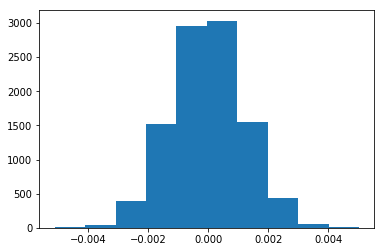

In [190]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)


In [191]:
#compute actual conversion rate
# number of landing new page and converted  / number of landing new page
converted_new = df2.query('converted == 1 and landing_page== "new_page"')['user_id'].nunique()
actual_new = float(converted_new) / float(N_new)

# number of landing old page and converted  / number of landing old page
converted_old = df2.query('converted == 1 and landing_page== "old_page"')['user_id'].nunique()
actual_old = float(converted_old) / float(N_old)

#observed difference in converted rate
obs_diff = actual_diff = actual_new - actual_old
obs_diff

-0.0015782389853555567

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [192]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

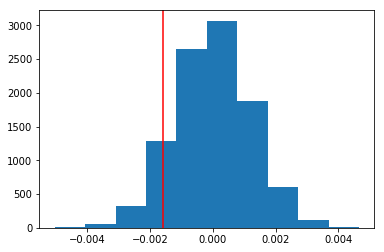

In [193]:
#Plot Null distribution
plt.hist(null_vals)
#Plot vertical line for observed statistic
plt.axvline(x=obs_diff,color ='red')

In [194]:
(null_vals > obs_diff).mean()

0.9061

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

The value 0.9061 we call it P-value, which suggests if there is a significant difference between 2 groups for a hypothesis. In this case, the new page doesn't have better conversion rates than the old page because the value 0.9 is much higher than the alpha, 0.05(Type I error rate ). We fail to reject the null. Therefore, the data show, with a type I error rate of 0.05, that the old page has higher probablity of convert rate than new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [195]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 and landing_page== "old_page"').user_id.nunique()
convert_new = converted_old = df2.query('converted == 1 and landing_page== "new_page"').user_id.nunique()
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

convert_old,convert_new , n_old , n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [231]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')
z_score, p_value
#  it's a one tail test so a z-score past 1.96 will be significant.

(-1.3109241984234394, 0.9050583127590245)

In [232]:
from scipy.stats import norm
norm.cdf(z_score) , norm.ppf(1-(0.05/2))
# norm.cdf(z_score):    how significant our z-score is
# norm.ppf(1-(0.05/2))  what our critical value at 95% confidence is

(0.09494168724097551, 1.959963984540054)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

* Since the z-score of 1.3109241984234394 does not exceed the critical value of 1.959963984540054, we fail to reject the null hypothesis. Therefore, the converted rate for new page and old page have no difference. This result is the same as parts J. and K. result.

* The z-score is greater than the value of -0.1645 (one-tail test) and hence it suggests that we can't reject the null. 
* And the p-value determines the significance of our resuls. The values are different from parts j and k but it still suggests that there is no statistically significant difference betweem the new and the old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.** Logistic Regression because the response variable is categorical

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [198]:
# create a colun for the intercept
df2['intercept'] = 1
df2.head()

C:\Users\Xi Zhou\Miniconda3\envs\my_working_environment3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [199]:
# create a dummy variable column for which page each user received
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head()

C:\Users\Xi Zhou\Miniconda3\envs\my_working_environment3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [200]:
log_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [201]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 Feb 2019   Pseudo R-squ.:               8.085e-06
Time:                        22:29:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

* p-value associated with ab_page is 0.19, which is different from the value found in PartII (0.9). But the larger p value still suggests the same inference that the old page is better than or equal to the new page.
* The previous p value computed was for a one sided test, whereas this one is two sided test. Hence there is a difference in the p value. 
* In Part II, we assume under the null hypothesis: 𝑝_𝑛𝑒𝑤 =  𝑝_𝑜𝑙𝑑 , Alternative hypothesis p_new > < p_old
* Here the alternative is 'not equal' which is a two sided test, while in the A/B test our hypotheses were different (a one tailed test)

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
* we can consider "timestamp" becuase the conversion rate is likely to have some kind of connection with different dates when it comes with holiday promotions, or different time like evenings when people get off work. 

* Disadvantage: the more terms , the model will be more complex. The results will be harder to interprete

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [202]:
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [203]:
# join two dataframes on common column 'user_id'
df3 = df2.join(df_country.set_index('user_id'),on='user_id')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [204]:
df3['country'].value_counts()

US    203620
UK     72466
CA     14499
Name: country, dtype: int64

In [205]:
# create dummy variables for country
df3[['US','UK','CA']] = pd.get_dummies(df3['country'])
df3 = df3.drop(df3['CA'])
df3['intercept'] = 1
log_mod = sm.Logit(df3['converted'], df3[['intercept','US','UK','ab_page']]) 
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            3
Date:                Thu, 07 Feb 2019   Pseudo R-squ.:               2.326e-05
Time:                        22:29:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1756
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.760      0.000      -2.007      -1.972
US            -0.0408      0.027     -1.516      0.129      -0.093       0.012
UK             0.0099      0.013      0.743      0.458      -0.016       0.036
ab_page       -0.0150      0.011     -1.309      0.191      -0.037       0.007
==============================================================================
"""

In [206]:
1/np.exp(-0.0150),np.exp(0.0506),np.exp(0.0408)

(1.015113064615719, 1.0519020483004984, 1.0416437559600236)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [208]:
# create dummy variables for country
df3['intercept'] = 1
# interaction between page and country 
df3['US_new'] = df3['US'] * df3['ab_page']
df3['UK_new'] = df3['UK'] * df3['ab_page']
log_mod = sm.Logit(df3['converted'], df3[['intercept','ab_page','US','UK','US_new' ,'UK_new' ]])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290577
Method:                           MLE   Df Model:                            5
Date:                Thu, 07 Feb 2019   Pseudo R-squ.:               3.485e-05
Time:                        22:29:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1915
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.341      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.508      0.132      -0.047       0.006
US            -0.0176      0.038     -0.466      0.641      -0.091       0.056
UK            -0.0058      0.019     -0.307      0.759      -0.043       0.031
US_new        -0.0469      0.054     -0.871      0.384      -0.152       0.059
UK_new         0.0314      0.027      1.182      0.237      -0.021       0.084
==============================================================================
"""

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [209]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0

References:
* https://github.com/Alicelibinguo/Analyzing-Website-Landing-Page-A-B-Test-Results-/blob/master/Analyze_ab_test_results_notebook.py
* https://github.com/IamMohitM/Analyze-A-B-Test-Results/blob/master/Analyze_ab_test_results_notebook.ipynb
* https://github.com/divyachandramouli/Analyze_AB_Test_Results/blob/master/DivyaC_Analyze_ab_test_results_notebook.ipynb